In [12]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
indir = '/Users/joakimkjellsson/Downloads/ml_project/'

fluxes_or = '%s/fluxes.nc' % (indir,)
fluxes_hi = '%s/fluxes_N48.nc' % (indir,)
fluxes_lo = '%s/fluxes_lores_N48.nc' % (indir,)

In [3]:
ds_or = xr.open_dataset(fluxes_or)
ds_hi = xr.open_dataset(fluxes_hi)
ds_lo = xr.open_dataset(fluxes_lo)

In [4]:
ds_or

<xarray.Dataset>
Dimensions:  (lon: 1024, lat: 768, time: 90)
Coordinates:
  * lon      (lon) float32 0.1758 0.5273 0.8789 1.23 ... 358.8 359.1 359.5 359.8
  * lat      (lat) float32 -89.88 -89.65 -89.41 -89.18 ... 89.41 89.65 89.88
Dimensions without coordinates: time
Data variables:
    Qe       (time, lat, lon) float32 ...
    Qh       (time, lat, lon) float32 ...
    Tau_x    (time, lat, lon) float32 ...
    Tau_y    (time, lat, lon) float32 ...
    Evap     (time, lat, lon) float32 ...

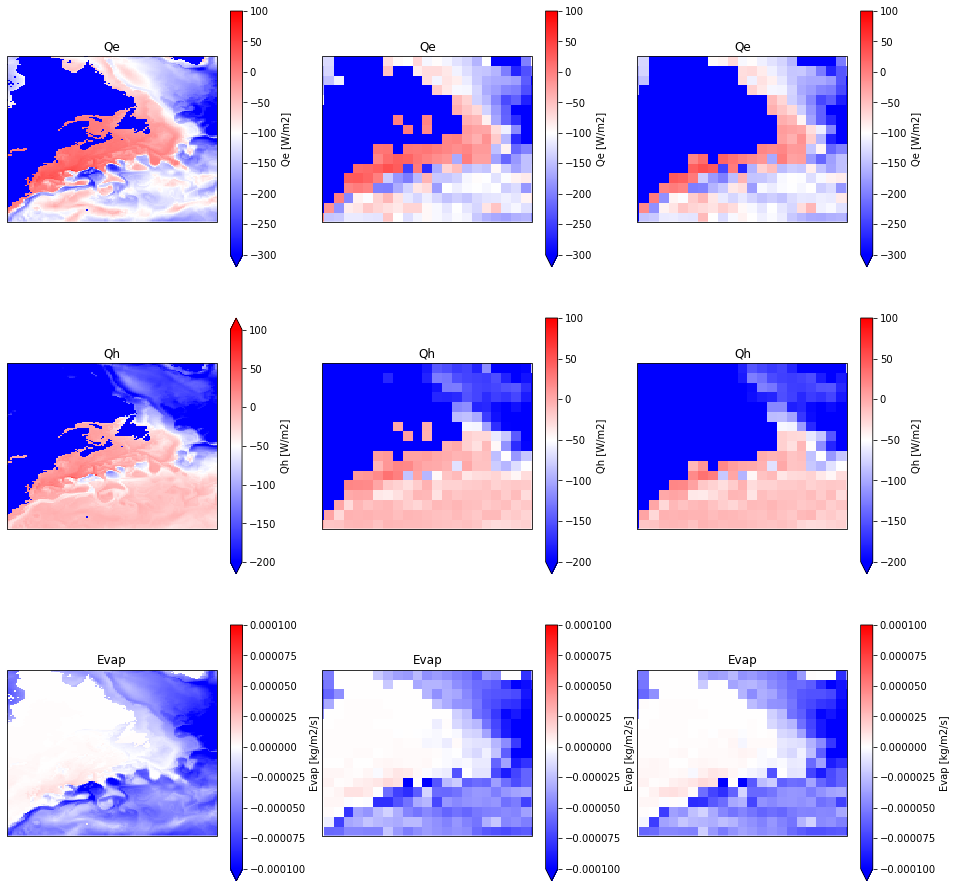

In [21]:
prj = ccrs.PlateCarree()
fig1, axs1 = plt.subplots(3,3, figsize=(16,16), subplot_kw = {'projection':prj})
ax1 = axs1.flat

variables = ['Qe','Qh','Evap']
ds_list   = [ds_or, ds_hi, ds_lo]
zmin      = [-300, -200, -1e-4]
zmax      = [100, 100, 1e-4]

i = 0
for (v, zmin, zmax) in zip(variables, zmin, zmax):
    for ds in ds_list:
        ds[v][0,:,:].plot(ax=ax1[i],vmin=zmin, vmax=zmax, cmap=plt.cm.bwr)
        ax1[i].set_title(v)
        
        ax1[i].set_extent([-80,-40,30,60])
        i += 1